# Welcome to Recitation 7!


#**Go Read `Rec07-Intro.pdf` if you have not already.** 

This lab will not make sense without it! 

## RECITATION ASSIGNMENT

This lab project will guide you through the analysis. You can do the recitation by uploading your notebook and the data to Google colab, or you can do it on your laptop with Anaconda.

**This recitation is longer than other recitations. It is meant to be started during recitation and then finished by the homework deadline.**

Even though the recitation isn't due until Monday April 5, don't put off starting it --- some of the questions require you to think through ambiguous situations, just like you'll need to do on the job. This is much easier when you have other people around you that you can ask for help.

## Data

To obtain data on how various variable values affect pouring and cooling, a batch
of 100 castings is poured with random variations in the mold variables about their baseline
values. The data are available in the file `castdata.csv` on github. Each row contains parameter
values (the inputs), and the cast batch time. The first line in the file contains the header
with the names of the variables. The data start in the second row. The first row of data has
the baseline values, that is, the values of the variables used in the current casting approach.

## Variables

The following variables can be varied: `Riser Height`, `Riser Diameter`, `Riser 1 Position`, `Riser 2 Position`, `Gate Diameter`, `Cup Height`, `Sprue Height`, `Sprue Diameter Bottom`, and `Sprue Diameter Top` (see Figure 2). The response variable is “`BatchTime`”.

## Importing Data

We first need to import the libraries necessary for this recitation. Next, we have to upload our data into the notebook; Upload the data set `castdata.csv` from the course github. We will call the entire data set `df`.

In [1]:
#math and arrays
import numpy as np
#dataframes
import pandas as pd
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
#linear regression and model selection 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
# 'df' is common pandas dataframe nomenclature
df = pd.read_csv('castdata.csv')
df.head()

,GateDiam,CupHeight,SprueHeight,RiserDiam,SprueDiamBot,SprueDiamTop,RiserHeight,Riser1Pos,Riser2Pos,BatchTime,Feasible
0,0.500000,5.000000,10.000000,7.000000,0.500000,0.750000,5.000000,3.500000,5.000000,3031.292318,1
1,0.318317,5.604768,10.148839,6.745247,0.635632,0.889822,5.318354,3.168774,5.233322,3042.417820,0
2,0.353834,5.846289,9.528183,7.345273,0.642489,1.005683,4.836570,3.265961,5.482437,3050.300487,1
3,0.596163,4.280124,10.887751,6.952856,0.317180,0.589558,5.492964,4.029533,4.719791,3034.202547,1
4,0.484338,5.205026,11.003688,7.254450,0.531424,0.595769,4.897376,4.011947,4.822747,3033.046509,1


## Visual Analysis

To examine the relationships between all pairs of variables ("`feasible`" is ignored through the use of `df.loc`, which splices the dataframe in the same way that one would a regular Python list), plot the dataframe with the pairplot command using the seaborn library:

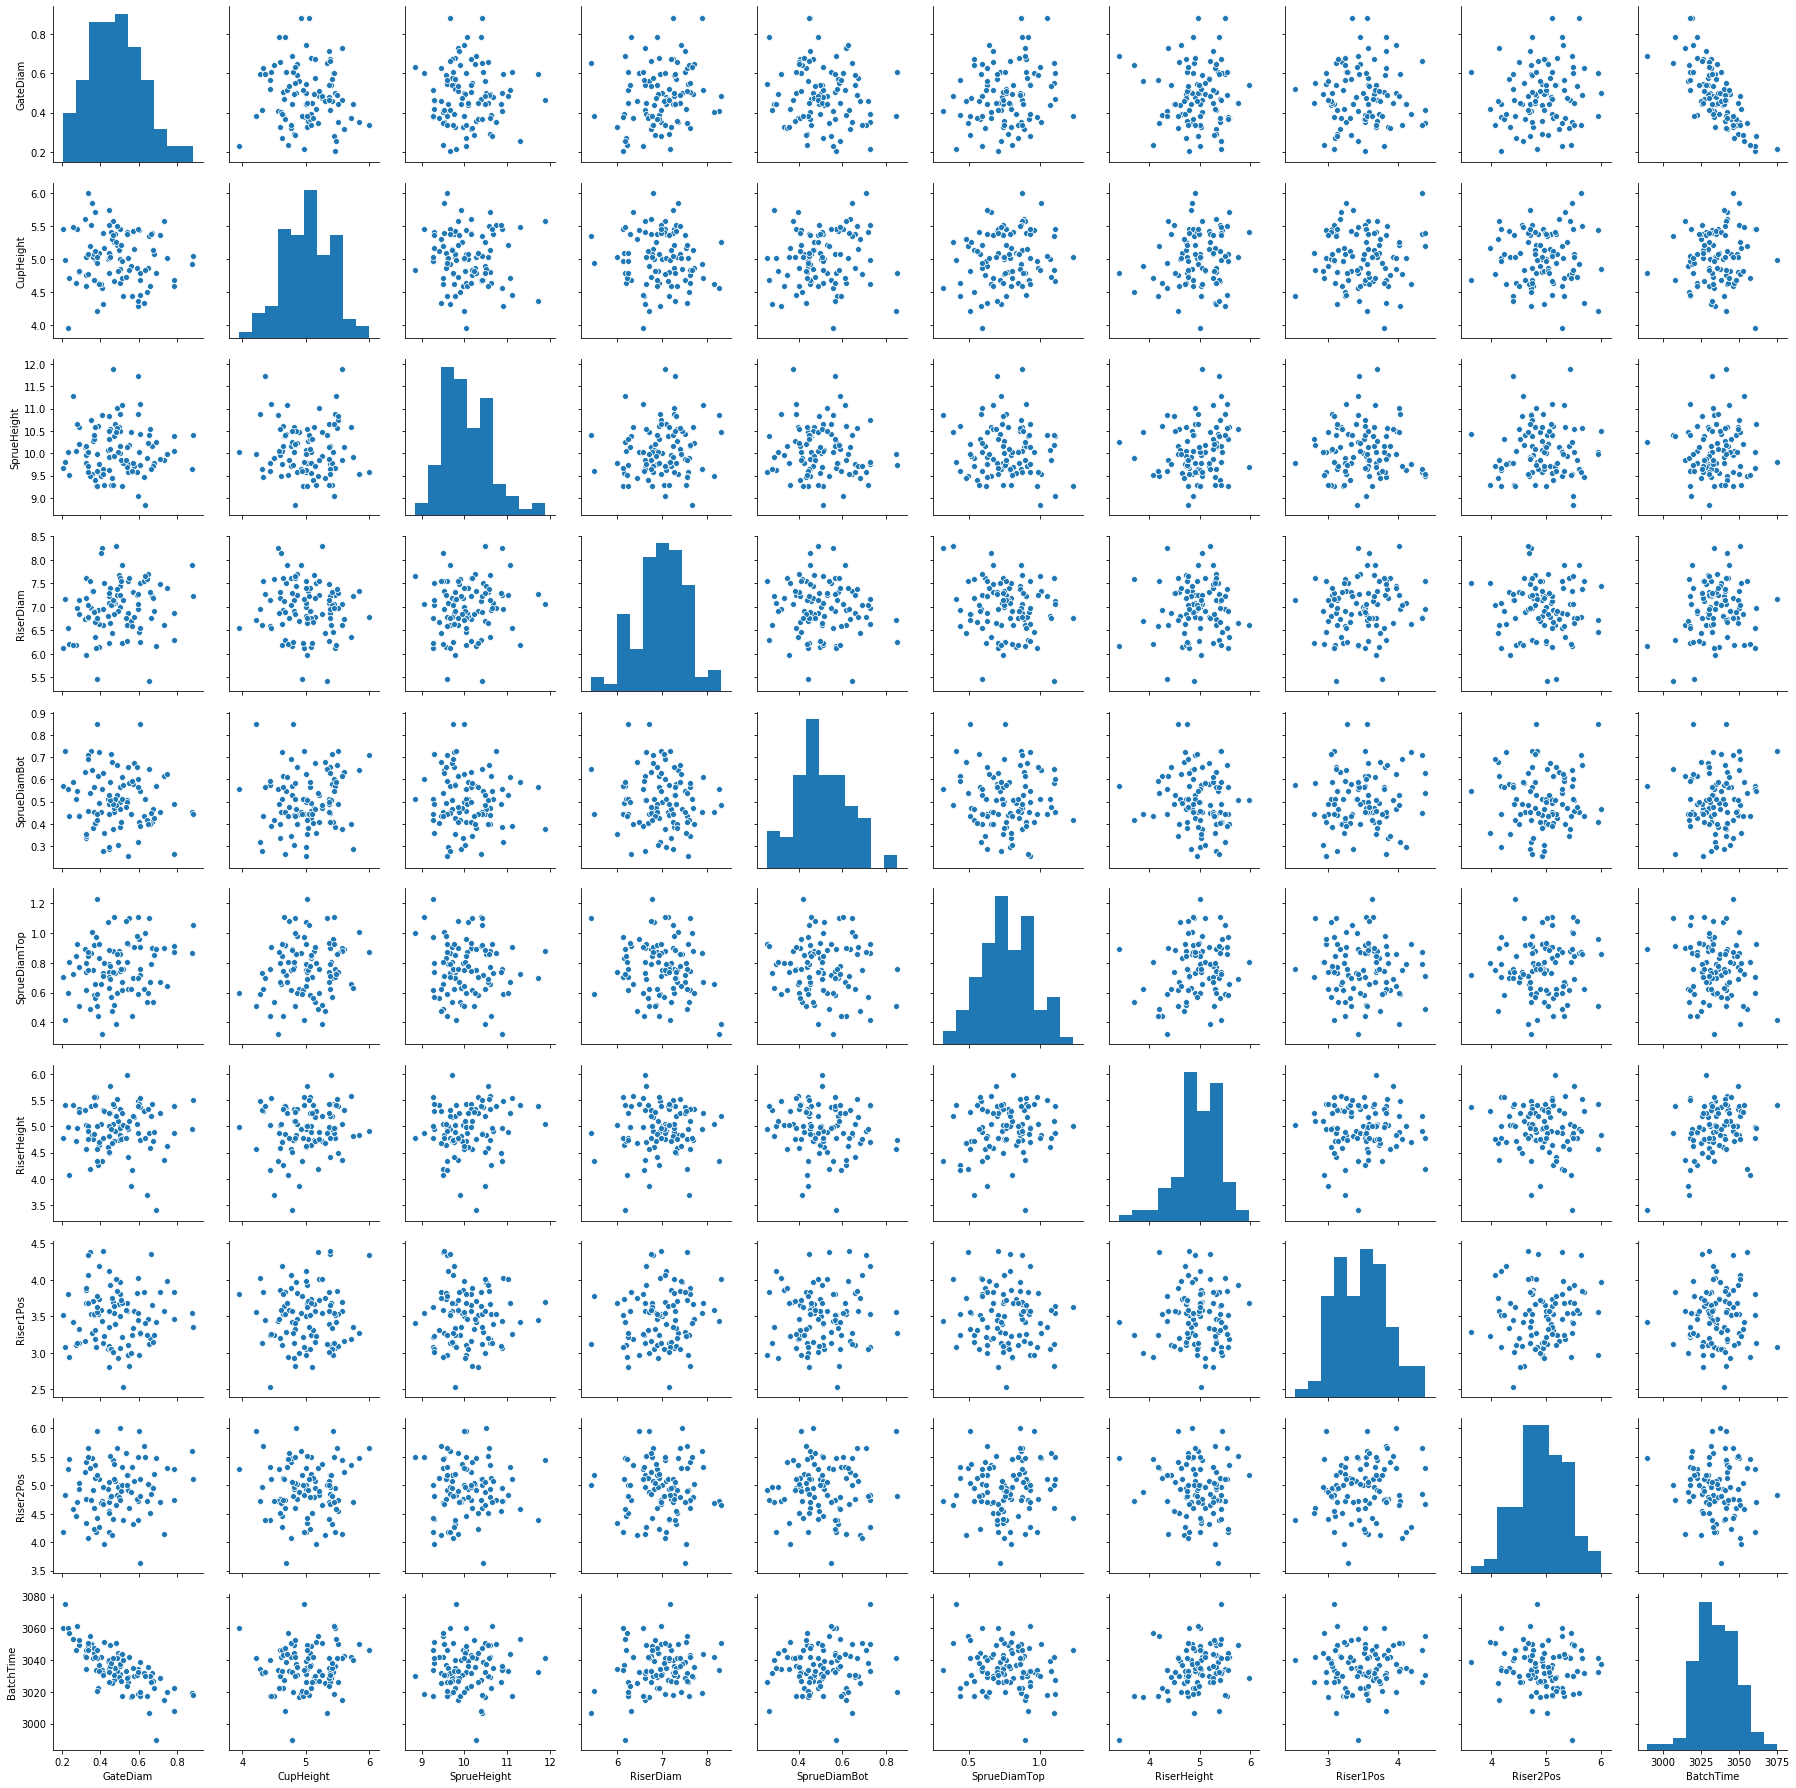

In [3]:
sns.pairplot(df.loc[:, :'BatchTime'])

When you pairplot a dataframe you get a scatterplot matrix. This matrix allows you to visualize all pairwise relationships between variables.

## Question 1

Based on the scatterplot matrix, which variable of the first 9 in df most affects "`BatchTime`"?

Hint: Pick a plot with `BatchTime` on the y-axis and one of the other variables on the x-axis. Think about a narrow window placed over the plot that only covers a small part of the x-axis and the full y-axis. Think about the average y-value of the points in this window. Then think about moving this window over the part of the x-axis where there is a lot of data. Does the average y-value change a lot and in a consistent direction over large parts of the x-axis? If so, then the variable on the x-axis affects `BatchTime` a lot.

Ans: GateDiam

## Multiple Linear Regression

We will now fit a multiple linear regression model for batch time using the mold variables as predictors. You'll see in the following code that we first import the statsmodels library. We then assign 'batchime' to be our dependent variable and 'X' to be our independent variables by splicing our dataframe as we did before. The line `X = sm.add_constant(X)` adds a column of all ones called `const` to X. This is needed to fit the intercept. 

Next, we create a regression model and get the results of the regression using model.fit(). Finally, we summarize these results. Run the code below to view the summary table.

In [4]:
batchtime = df["BatchTime"]
X = df.loc[:, :'Riser2Pos']
X = sm.add_constant(X) 

model = sm.OLS(batchtime, X)
results = model.fit()

# Print out the stats
results.summary()

C:\Users\bls24\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BatchTime   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     33.18
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           6.54e-25
Time:                        14:25:04   Log-Likelihood:                -326.08
No. Observations:                 100   AIC:                             672.2
Df Residuals:                      90   BIC:                             698.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2974.3611     20.133    147.736      0.000    2934.363    3014.359
GateDiam       -73.7652      4.919    -14.996      0.000     -83.538     -63.993
CupHeight        0.0650      1.766      0.037      0.971      -3.444       3.574
SprueHeight     -0.9823      1.236     -0.794      0.429      -3.439       1.474
RiserDiam        8.1317      1.304      6.238      0.000       5.542      10.722
SprueDiamBot     6.2152      5.638      1.102      0.273      -4.986      17.417
SprueDiamTop     0.5189      4.054      0.128      0.898      -7.536       8.574
RiserHeight      9.1809      1.617      5.679      0.000       5.969      12.392
Riser1Pos       -1.0727      1.816     -0.591      0.556      -4.681       2.536
Riser2Pos        0.8287      1.477      0.561      0.576      -2.105       3.763
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.531
Skew:                           0.035   Prob(JB):                        0.767
Kurtosis:                       2.650   Cond. No.                         469.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This summary output may seem intimidating at first; let's focus on the independent variables (section that vertically lists our variables with "coef", "std err", ...). Specifically, we are interested in the column titled $P>|t|$, which gives the p-value or statistical significance for that variable. Here's a way to interpret these values: a p-value of .01 would indicate statistical significance at the 99% level for that variable. In determining the degree of effect a variable has on `BatchTime`, simply observe how large the coefficent is; this means that a small change in that variable has a significant impact on our dependent variable, `BatchTime`.

## Question 2
Observe the summary output in the model for `BatchTime`. Which variables appear to be statistically significant at the 95% level, and how do they affect the `BatchTime`? Which predictor(s) have the largest effect on `BatchTime`?

Ans: Viariables GateDiam, RiserHeight, and RiserDiam appear to be statistically significant at the 95% level, since their p-values are all below 0.05. GateDiam's coefficient is -73.7, RiserHeight's is 9.2, and RiserDiam's is 8.1 which corresponds to the magnitude and the directional relationship that each variable effects BatchTime. As GateDiam decreases, BatchTime increases and as RiserHeight and RiserDiam increases, BatchTime decreases. Predictor GateDiam has the largest effect on BatchTime, since its abs(coefficient) is significantly greater than the other statistically significant variables. 

Now, for each of our variables, we would like to plot the fitted values from our regression versus those for the actual BatchTime using Matplotlib; run the code below and observe the graphs.

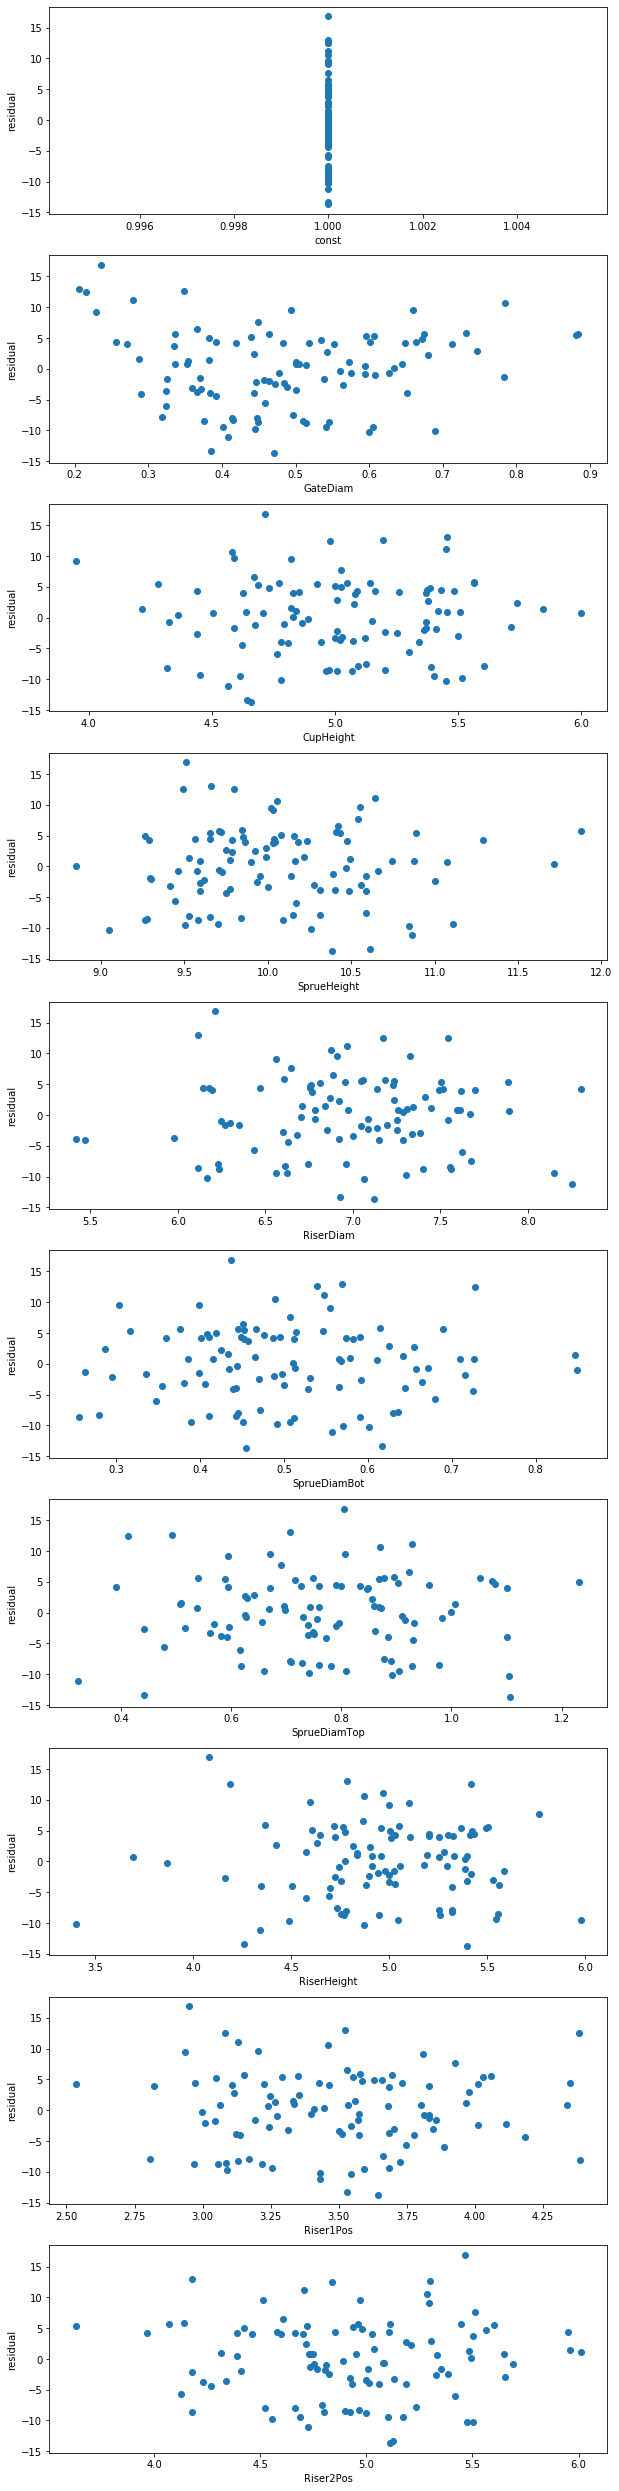

In [5]:
fig, ax = plt.subplots(10,figsize =(10,45))
resid = results.resid
for i in range(10): # for each of the nine variables
  # create a fitted plot for that variable ('i' indexes the variables)
  ax[i].scatter(X.iloc[:,i],resid) 
  ax[i].set_xlabel(X.columns[i]) 
  ax[i].set_ylabel("residual")

## Question 3

Examine the nine plots. Based on the plots, are the residuals independent of the covariates?  (This was the 2nd thing that we checked in Lecture 12.)

To check, this use the same windowing trick as above on the plot of the residuals vs. each covariate. Think about moving a narrow window over small ranges for the covariate where there is a lot of data (more than 1 or 2 points).  Does the average value of the residual in this window change as you move the window?  If it changes a lot and in a consistent direction, this means that the residuals are not independent of that covariate.

You may find that you aren't sure whether you are seeing a nonlinear pattern or not. That is ok. Ambiguity is part of data science and it is important to become comfortable with it.  To help you, we expect that there is one covariate that is not independent of the residuals. Write down the name of the covariate for which you most suspect this to be true.

Ans: The residuals of each of the plots are independent of the covariates, exept for the plot of the residual vs GateDiam.

## Question 4


Are the other assumptions about the errors made by linear regression satisfied? In particular, address the following questions:

* Do the residuals appear mutually independent? Use an autocorrelation plot to check. Code to help you is below.
* Are there any problems with non-constant variance? Plot the absolute value of the residuals vs. each covariate to check.
* Do the residuals appear normallly distributed? Use a qqplot to check.

Hint 1: You may want to refer to the `test-assumptions.ipynb` demo on github for ideas of visualizations that are helpful to answer these questions. 

Hint 2: Normally distributed residuals will form a line of a qq-plot, though not necessarily the 45-degree line. The slope is dependent on the variance of the residual. Try running the code below with various choices of `sigma` to convince yourself of this.  

Hint 3: To check non-constant variance, plot the absolute value of the residuals vs. each covariate. Then use the windowing trick and ask whether the average y-value changes as you move the window. Covariates where the residuals are not independent of the covariates are usually going to have problems with non-constant variance, so we expect to see a problem with the covariate that you identified in Question 3.

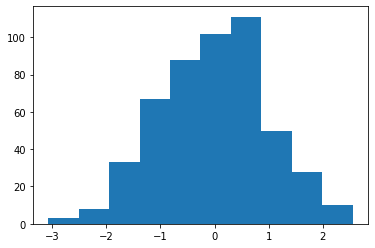

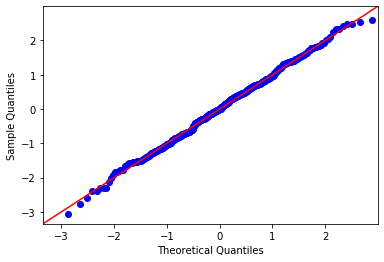

In [6]:
#Code for Hint 2

sigma = 1 #rerun this code with various choices of sigma, e.g. 0.5, 5

n=500
eps = sigma * np.random.randn(n) # normal residuals 
x = 10*np.random.rand(n)
y = x + eps
model = sm.OLS(y,x).fit()

# scipy.stats.probplot(data, dist="norm", plot=plt);
plt.hist(eps)
sm.qqplot(model.resid, line='45');

##########


Ans:

1) The residuals do appear mutually independent. I know this because the autocorrelation plot indicates that there is an insignificant difference in the linear regression values for lags from -10 to 10

2) There are no problems with non-constant variance based on the pyplots below

3) Yes, the residuals are normally distributed. This is confirmed using the histogram plot and the qq plots above.

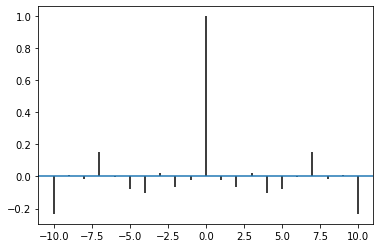

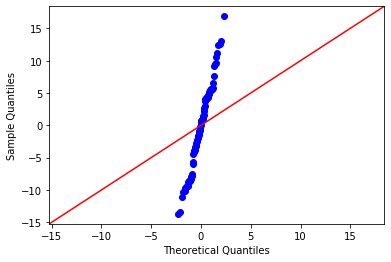

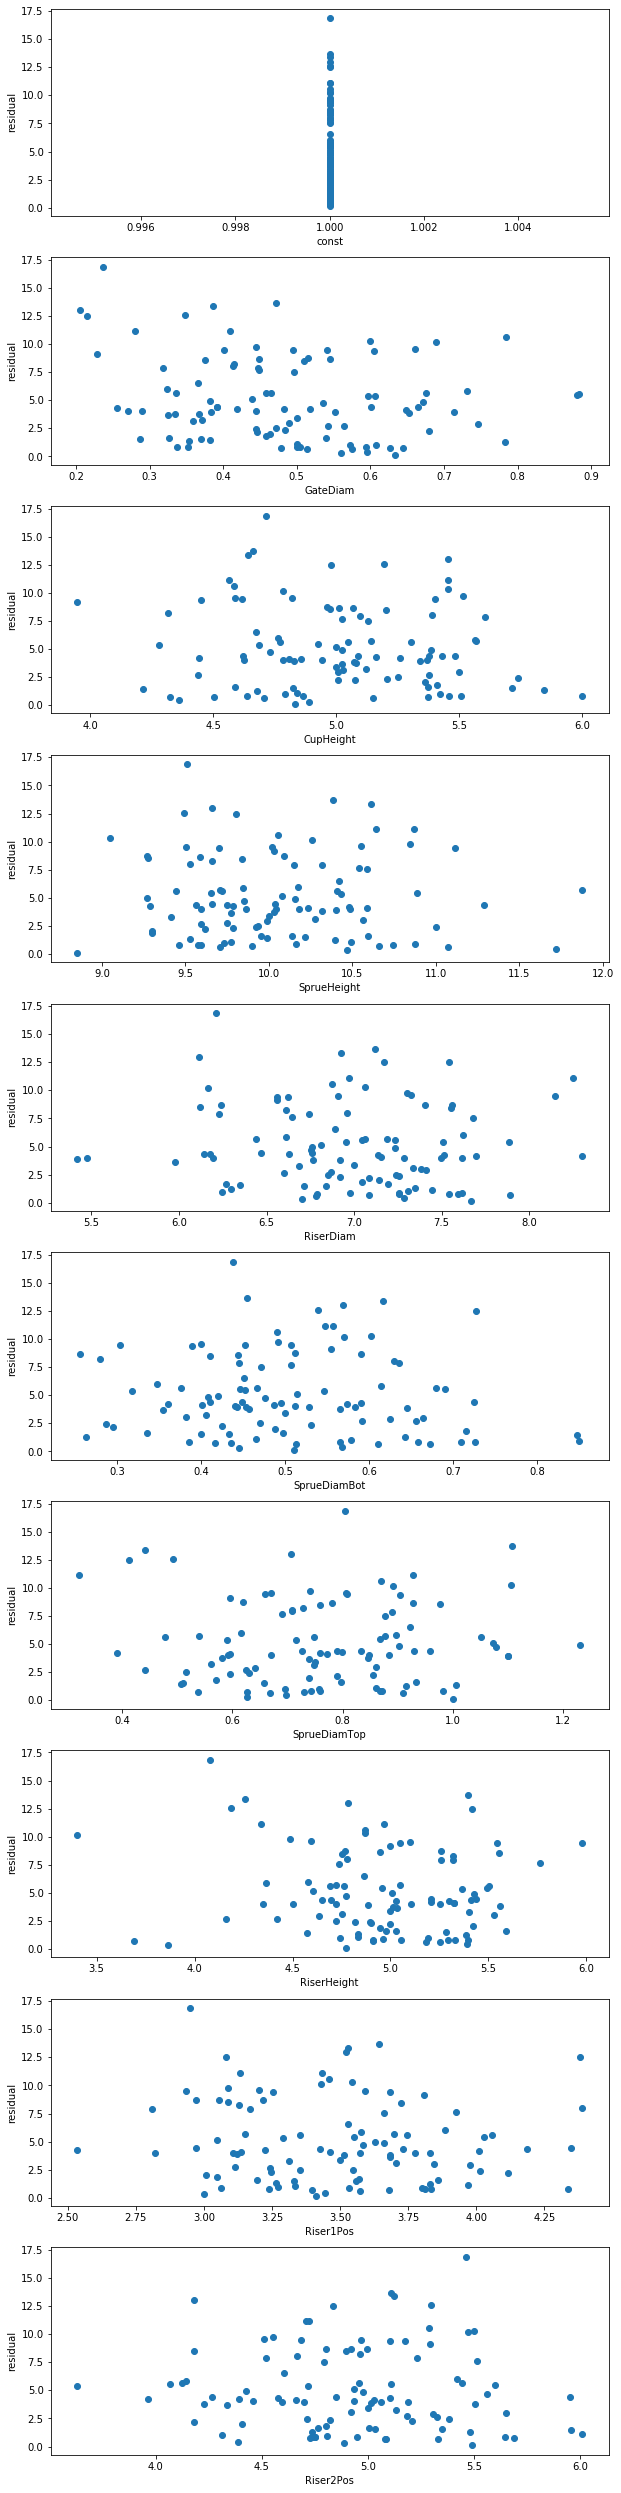

In [7]:
# Code for autocorrelation plot
plt.acorr(resid)
sm.qqplot(resid, line='45');
fig, ax = plt.subplots(10,figsize =(10,45))
for i in range(10): # for each of the nine variables
  # create a fitted plot for that variable ('i' indexes the variables)
  ax[i].scatter(X.iloc[:,i],np.abs(resid)) 
  ax[i].set_xlabel(X.columns[i]) 
  ax[i].set_ylabel("residual")

## Adding nonlinear terms

You may have noticed that `BatchTime` is nonlinearly related to `GameDiam`. Use the following commands to repeat the regression analysis with quadratic and cubic terms. 

In [8]:
X['GateDiamSquared'] = X['GateDiam']**2 # add quadratic term for GateDiam
X['GateDiamCubic'] = X['GateDiam']**3  # add cubic term
model2 = sm.OLS(batchtime, X)
results2 = model2.fit()

# Print out the stats
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BatchTime   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     40.52
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           1.01e-29
Time:                        14:25:08   Log-Likelihood:                -309.10
No. Observations:                 100   AIC:                             642.2
Df Residuals:                      88   BIC:                             673.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3028.3393     20.371    148.662      0.000    2987.857    3068.822
GateDiam         -476.1945     90.302     -5.273      0.000    -655.651    -296.738
CupHeight           1.1435      1.519      0.753      0.454      -1.876       4.162
SprueHeight        -0.8335      1.056     -0.790      0.432      -2.931       1.264
RiserDiam           9.5573      1.141      8.374      0.000       7.289      11.825
SprueDiamBot        4.5050      4.838      0.931      0.354      -5.110      14.120
SprueDiamTop        1.4360      3.480      0.413      0.681      -5.480       8.352
RiserHeight         9.1068      1.381      6.594      0.000       6.362      11.852
Riser1Pos          -0.7958      1.560     -0.510      0.611      -3.895       2.304
Riser2Pos           0.7674      1.263      0.608      0.545      -1.742       3.277
GateDiamSquared   694.4074    176.257      3.940      0.000     344.134    1044.681
GateDiamCubic    -367.9510    108.946     -3.377      0.001    -584.457    -151.445
==============================================================================
Omnibus:                        0.361   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.523
Skew:                          -0.102   Prob(JB):                        0.770
Kurtosis:                       2.710   Cond. No.                     6.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

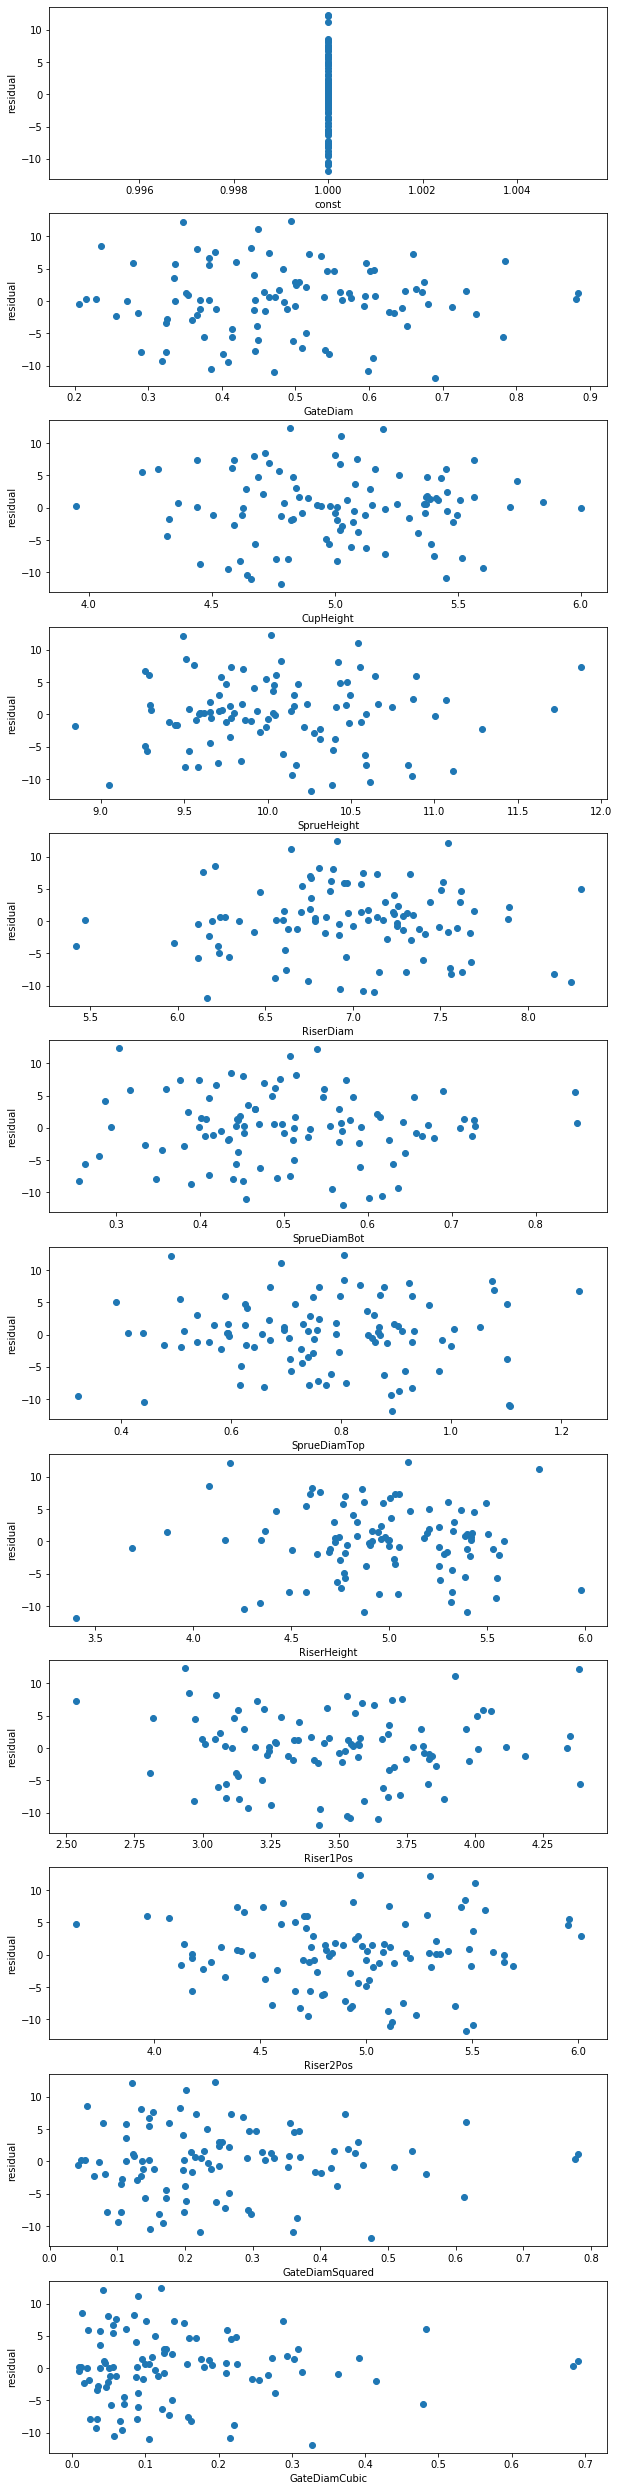

In [9]:
fig, ax = plt.subplots(12,figsize =(10,45))
resid = results2.resid
for i in range(12): # for each of the nine variables
  # create a fitted plot for that variable ('i' indexes the variables)
  ax[i].scatter(X.iloc[:,i],resid) 
  ax[i].set_xlabel(X.columns[i]) 
  ax[i].set_ylabel("residual")

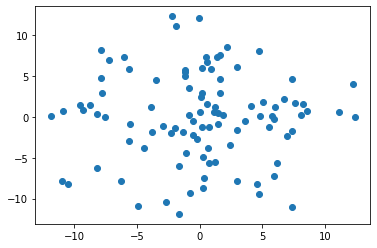

In [10]:
plt.scatter(resid[:-1], resid[1:])

### Question 5

Now based on the new model we have just fit, are the assumptions about the errors made satisfied? In particular, check the same things you checked above.
* Are the residuals indepedent of each other (autocorrelation plot)
* Are the residuals independent of the covariates (residual plots)
* Are there problems with non-constant variance (plot of absolute residuals)
* Do the residuals appear normall distributed? (qq plot)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.16830658,  0.03212724,  0.02093243,  0.18251278, -0.06771786,
        -0.11193967, -0.07366885, -0.15959377,  0.00890039,  0.00677861,
         1.        ,  0.00677861,  0.00890039, -0.15959377, -0.07366885,
        -0.11193967, -0.06771786,  0.18251278,  0.02093243,  0.03212724,
        -0.16830658]),
 <matplotlib.lines.Line2D at 0x2953ec4f438>)

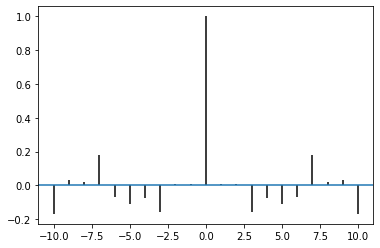

In [11]:
plt.acorr(results2.resid)

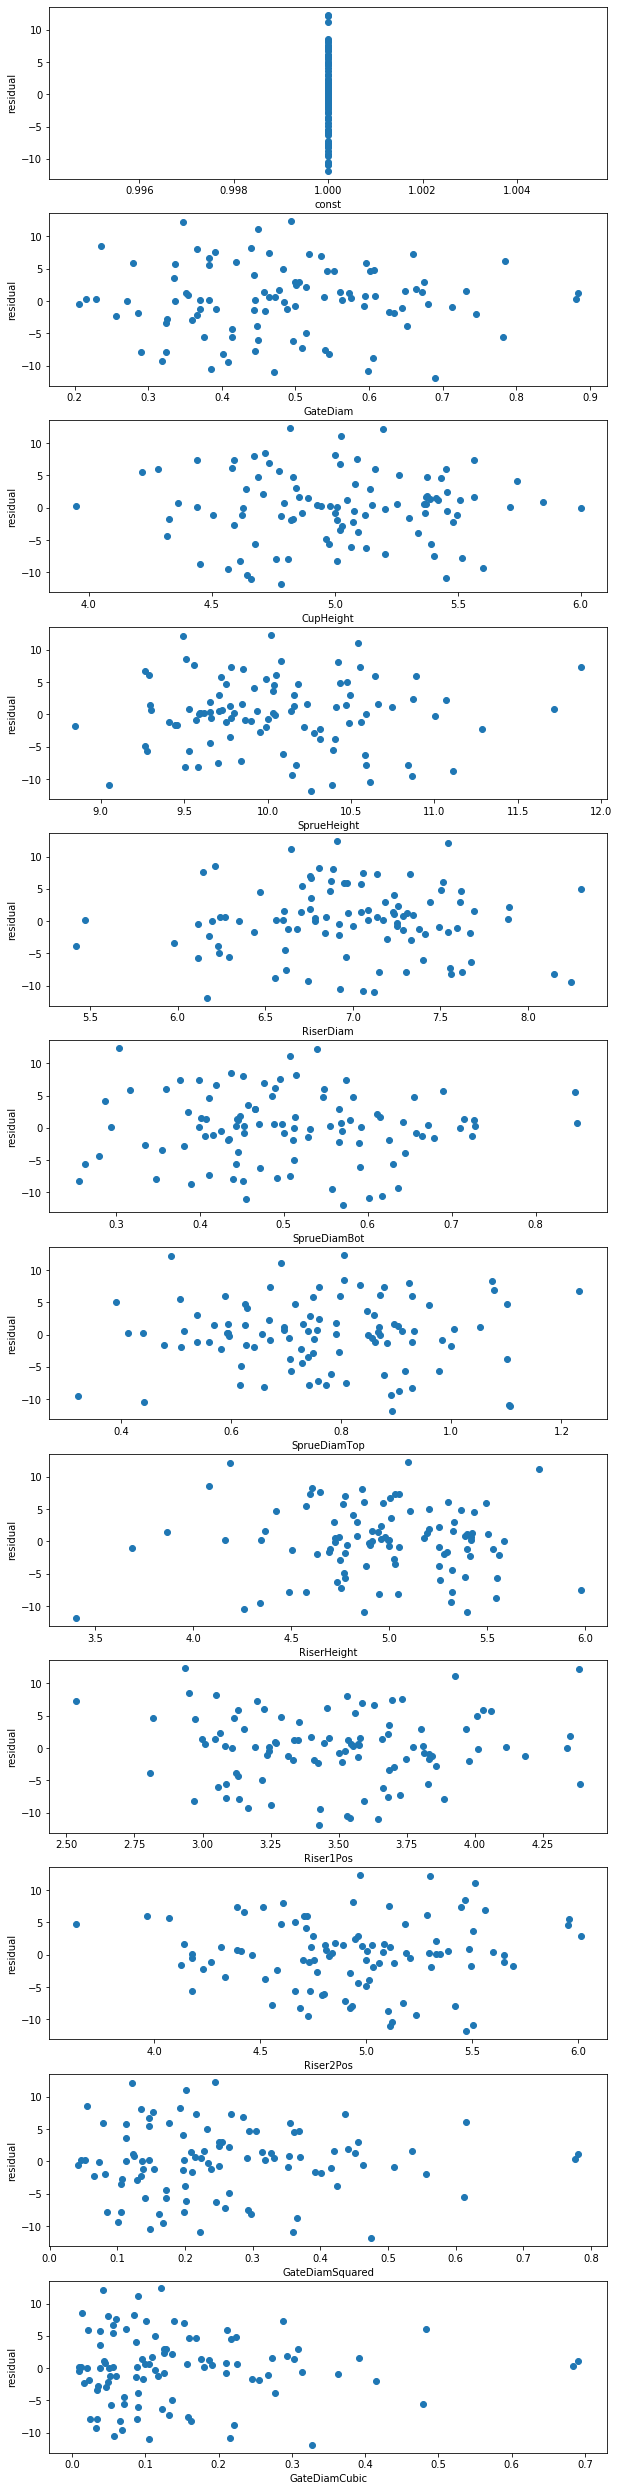

In [12]:
fig, ax = plt.subplots(12,figsize =(10,45))
resid = results.resid
for i in range(12): # for each of the nine variables
  # create a fitted plot for that variable ('i' indexes the variables)
  ax[i].scatter(X.iloc[:,i],results2.resid) 
  ax[i].set_xlabel(X.columns[i]) 
  ax[i].set_ylabel("residual")

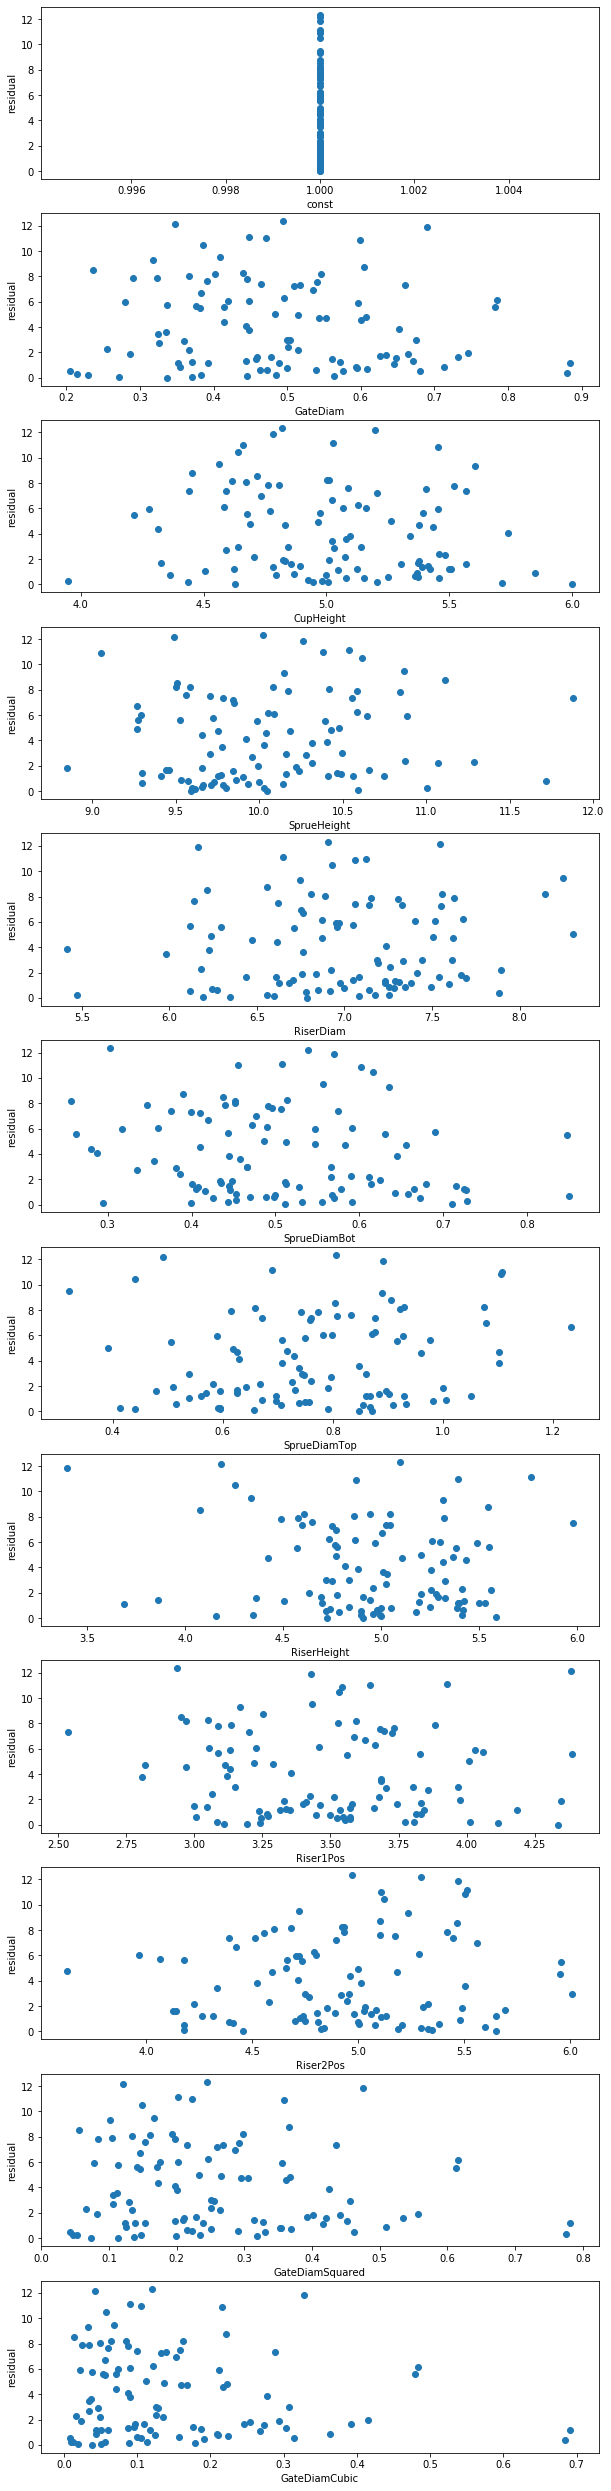

In [13]:
fig, ax = plt.subplots(12,figsize =(10,45))
for i in range(12): # for each of the nine variables
  # create a fitted plot for that variable ('i' indexes the variables)
  ax[i].scatter(X.iloc[:,i],np.abs(results2.resid)) 
  ax[i].set_xlabel(X.columns[i]) 
  ax[i].set_ylabel("residual")

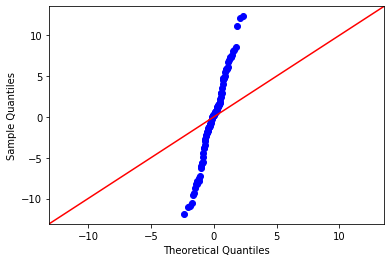

In [14]:
sm.qqplot(results2.resid, line='45');

Ans: All four major assumptions are satisfied based on the plots above

## Model Selection

Now we want see if we can find a new model that uses fewer covariates. Simpler is better if we can find one that has comparable predictive power.

Wait to do this part until you have seen the lecture on AIC and model selection (planned for Thursday).

First we must split our data into training and testing sets so that we can test our models accurately. 

Run the following code to split your data. 


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, batchtime, test_size=0.25, random_state=0)

We will use the AIC, or Akaike Information Criterion, and p-values to select the covariates to include in our model. 

The AIC is a number computed from a model and a set of data that tells us how "good" the model is at explaining that data. Lower is better. The score is a combination of two things:
* the sum of squared errors, and so penalizes the inability to fit and predict the data well. 
* the number of parameters, and so penalizes being complicated.

The p-value is a number that is often used to test whether the outcome (in our case `BatchTime`) depends on a covariate or not.

The following code tries to improve our model by iteratively doing the following:
* Removing covariates with big p-values --- intuitively, since p-values are usually only big when a covariate has no influence on the outcome, this should only get rid of covariates that have no influence.
* Checking the AIC of the new model to see if it is better --- it will be better if the sum of squared errors hasn't gotten too much worse.

Note that looking at p-values many times is dangerous and ruins the statistical guarantees that they provide. We are doing this anyway here. We mitigate the danger by only doing this on the training set, and then using the test set (which we haven't looked at to select our model) in order to evaluate the model we chose (below).

The code then assesses perfomance using the mean-squared error --- this is the sum of squared errors, divided by the number of predictions we've made. It is a widely used error measure in machine learning and statistics. Lower mean-squared error is better.

In [16]:
def minAIC(X,y):
    variables = X.columns
    model = sm.OLS(y,X[variables]).fit()
    while True:
        maxp = np.max(model.pvalues)
        new_variables = variables[model.pvalues < maxp]
        newmodel = sm.OLS(y,X[new_variables]).fit()
        if newmodel.aic < model.aic:
            model = newmodel
            variables = new_variables
        else:
            break
    return model,variables

# select on training set 
model,variables = minAIC(X_train, y_train)
print(variables)


y_pred = model.predict(X_test[variables])
print(mean_squared_error(y_test,y_pred))

Index(['const', 'GateDiam', 'SprueHeight', 'RiserDiam', 'RiserHeight',
       'GateDiamSquared', 'GateDiamCubic'],
      dtype='object')
32.83260941649599


## Question 6 

Which features does AIC select? What is the mean squared error for the testing set?

Ans: The AIC selects the features GateDiam, SprueHeight, RiserDiam, RiserHeight, GateDiamSquared, GateDimCubic. The mean squared error for the testing set is ~32.83

Now train a model on the training set that uses all the features. 

In [17]:
#Code here
model = sm.OLS(y_train,X_train).fit()
print(X_train.columns.values)

['const' 'GateDiam' 'CupHeight' 'SprueHeight' 'RiserDiam' 'SprueDiamBot'
 'SprueDiamTop' 'RiserHeight' 'Riser1Pos' 'Riser2Pos' 'GateDiamSquared'
 'GateDiamCubic']


## Question 7

What is the mean squared error for the model that uses all of the features? Which model do you prefer and why?

In [18]:
#Code for MSE here
y_pred = model.predict(X_test)
print(mean_squared_error(y_test,y_pred))

34.429037198526814


Ans: The mean squred error of the model that uses all of the features is ~34.43. I would prefer the model above with less features as the mean squared error of the model is smaller than this one.